## Pre-Report
---


> **Perceptron limitations:**

Perceptron networks have several limitations. First, the output values of a perceptron can take on only one of two values (0 or 1) due to the hard-limit transfer function. Second, perceptrons can only classify linearly separable sets of vectors. If a straight line or a plane can be drawn to separate the input vectors into their correct categories, the input vectors are linearly separable. If the vectors are not linearly separable, learning will never reach a point where all vectors are classified properly.

> **Multi layer perceptron model:**





## Report
---


### MLP (multi-layer perceptron) class


*   **class constructor:** Takes X and y as data and target for training and other network parameters, assume weights and biases with random values as initial values.

*   **sigmoid, Linear:** For each layer we assume all the neurons have the same activation function. We use one of the following 2 famous activation functions for each layer. sigmoid and linear
*   **predict:** The input is given to the first layer and the output of the first layered is found after that. The the output of the first layer goes to the second layer as its input. The output of the second layer is then found easily. This process goes on until the last layer ouput is found which is the output of the neural net. This process is called forward propagation.
*   **fit:** For the training process, in each iterations we choose a random sample from the dataset. After giving the sample input to the neural net, forward propagation is done so that the network output is generated. After that backpropagation is done with the sample target and the weights and biases are updated. Obviously, with a proper learning rate, in each iteration, the loss function must get smaller and smaller.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random


class MLP:
  def __init__(self, X, y, hidden_layer_neuron = 10, lr = 0.01):
    self.x = X
    self.y = y
    self.lr = lr   # learning rate
    self.S = hidden_layer_neuron   # number of hidden layer neuron
    self.nos, self.n = X.shape   # number of samples, number of X features
    self.p = y.shape[1]   # number of y features
    self.w1 = np.random.rand(self.S, self.n)
    self.w2 = np.random.rand(self.p, self.S)
    self.b1 = np.random.rand(self.S, 1)
    self.b2 = np.random.rand(self.p, 1)
    self.f1 = self.sigmoid
    self.f2 = self.linear

  def sigmoid(self, x, is_diff=False):
    if is_diff:
      return np.exp(-x) / (1 + np.exp(-x))**2
    else:
      return 1 / (1 + np.exp(-x))

  def linear(self, x, is_diff=False):
    if is_diff:
      return np.ones(x.shape)
    else:
      return x

  def predict(self, X):
    # Forward Propagation
    self.n1 = self.w1.dot(X.T) + self.b1
    self.a1 = self.f1(self.n1)
    self.n2 = self.w2.dot(self.a1) + self.b2
    self.a2 = self.f2(self.n2)
    return self.a2.T

  def fit(self, epochs = 10000):
    for i in range(epochs):
      sample = random.randint(0, self.nos - 1)
      x_sample = self.x[sample : sample+1]
      y_sample = self.y[sample : sample+1].T
      y_predicted = self.predict(x_sample).T
      # Backpropagation
      F1 = np.eye(self.S) * self.f1(self.n1, True)
      F2 = np.eye(self.p) * self.f2(self.n2, True)
      s2 = -2 * F2.dot(y_sample - y_predicted)
      s1 = F1.dot(self.w2.T).dot(s2)
      # Updating weights and biases
      self.w1 = self.w1 - self.lr * s1.dot(x_sample)
      self.b1 = self.b1 - self.lr * s1
      self.w2 = self.w2 - self.lr * s2.dot(self.a1.T)
      self.b2 = self.b2 - self.lr * s2
    return self

### Evaluation of MLP class over sinusoidal example

First of all, let's have 21 points in the interval [-2, 2] and make a dataset of 

$ y = 1 + sin(\frac{\pi}{4}x) $

for each point x in the sampled points.

we want to create a MLP model can predict y (target) from the X (data).

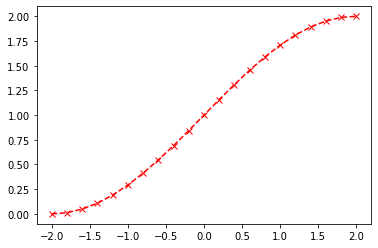

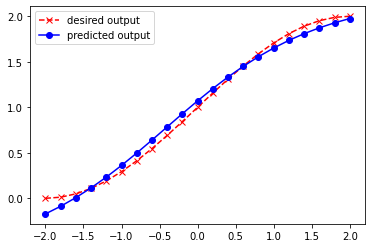

In [ ]:
# Create sinus data
X = np.linspace(-2, 2, 21)
X = np.expand_dims(X, 1)
y = 1 + np.sin((np.pi / 4) * X)
# Show data 
plt.figure()
plt.plot(X[:, 0], y[:, 0], 'r--x')
plt.show()

# Create MLP object and train with dataset
nn = MLP(X, y, 10, lr=0.01)
nn.fit(epochs=1000)
o = nn.predict(X)
# Show predicted data on the gird
plt.figure()
plt.plot(X[:, 0], y[:, 0], 'r--x', X[:, 0], o[:, 0], 'b-o')
plt.legend(['desired output', 'predicted output'])
plt.show()

### Sinusoidal example with Keras

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 0s 367ms/step - loss: 3.8004
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7852
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 3.7700
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 3.7549
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7398
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 3.7247
Epoch 7/100
1/1 [==============================] -

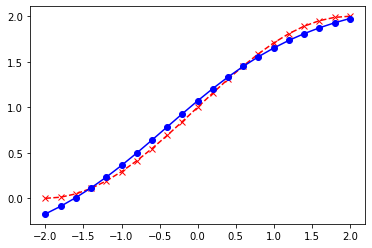

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(5, activation='sigmoid', input_shape=(1,)))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=100)

plt.figure()
plt.plot(X[:, 0], y[:, 0], 'r--x', X[:, 0], o[:, 0], 'b-o')
plt.show()

## Exercise
---







> ### 2- California Housing Price Prediction [dataset](https://www.kaggle.com/harrywang/housing):



**A-**
This dataset consists of 9 features:

1.   longitude: A measure of how far west a house is; a higher value is farther west
2.   latitude: A measure of how far north a house is; a higher value is farther north
3.   housingMedianAge: Median age of a house within a block; a lower number is a newer building
4.   totalRooms: Total number of rooms within a block
5.   totalBedrooms: Total number of bedrooms within a block
6.   population: Total number of people residing within a block
7.   households: Total number of households, a group of people residing within a home unit, for a block
8.   medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9.   medianHouseValue: Median house value for households within a block (measured in US Dollars)

> *median_house_value* is our target feature, we will use other features to predict it.

The task is to predict how much the houses in particular block cost (the median) based on information of blocks location and basic sociodemographic data

In [16]:
import numpy as np
import pandas as pd

# Read and display data
df = pd.read_csv(r'/content/sample_data/california_housing_train.csv')
data = df.iloc[:,:8].to_numpy()
target = df.iloc[:,8:].to_numpy()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


**B-**
Overfitting means that our model is modeling has learned the training data too well.
Formally, overfitting referes to the situation where a model learns the data but also the noise that is part of training data to the extent that it negatively impacts the performance of the model on new unseen data.

In other worlds, the noise (i.e. random fluctuations) in the training set is learned as rules/pattenrs by the model. However, these noisy learned representations do not apply to new unseen data and thus, the model’s performance (i.e. accuracy, MSE, MAE) is negatively impacted.

In this problem (California Housing Price Prediction) overfitting is when **the model’s error on the training set** (i.e. during training) is **very low** but then, **the model’s error on the test set** (i.e. unseen samples) is **large**!

---

**E-**
1) Increasing the number of hidden layers might improve the accuracy or might not, it depends on the complexity of the problem.

2) Increasing the number of hidden layers much more than the sufficient number of layers will cause accuracy in the test set to decrease, yes. It will cause the MLP network to overfit to the training set, that is, it will learn the training data, but it won't be able to generalize to new unseen data. so if we increase the number of hidden layers too much we will face the overfitting problem.